# Prepare Development Environment

In [19]:
# import Library
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [20]:
# Colab data upload
from google.colab import files
uploaded = files.upload()

Saving abc_wave_counting2.csv to abc_wave_counting2 (2).csv


# Data Load

In [89]:
# 데이터 준비
data_set = np.loadtxt("abc_wave_counting2.csv", delimiter=",",skiprows=1)
x = data_set[:,0:10]
y = data_set[:,11]

(row,column) = x.shape

In [90]:
print(column)

10


# Model implement

In [91]:
# Model implement
model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=22,activation='relu',input_shape=(column,)),
    #tf.keras.layers.Dense(units=4,activation='relu'),
    tf.keras.layers.Dense(units=1)
])

model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_25 (Dense)            (None, 22)                242       
                                                                 
 dense_26 (Dense)            (None, 1)                 23        
                                                                 
Total params: 265
Trainable params: 265
Non-trainable params: 0
_________________________________________________________________


# Model Compile & Training

In [92]:
# Model Compile of Linear Regression
model.compile(optimizer='adam',
              loss='mean_squared_error')

In [93]:
# Callback class implement
class MyCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if(logs.get('loss') < 1000):
            self.model.stop_training = True
            print('\n>>> Epoch :',epoch,', Loss(MSE) :',{logs.get('loss')})

callbacks = MyCallback()

In [94]:
# Training
history = model.fit(
    x,
    y,
    batch_size = 1,
    epochs=10000,
    callbacks=[callbacks],
    verbose=0
)


>>> 8015 , {744.9537353515625}


# History Visualization

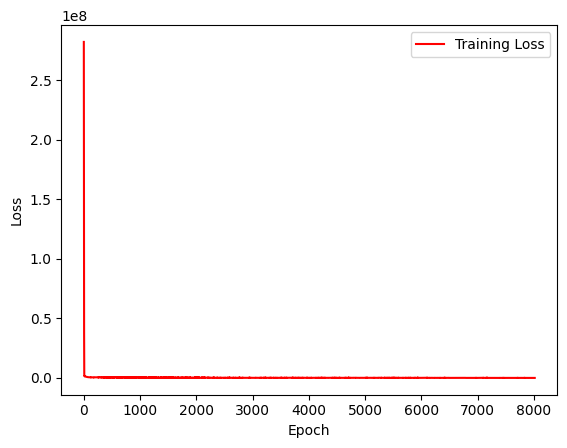

In [95]:
# Visualization of Loss
epoch_count = range(1, len(history.history['loss']) + 1)
plt.plot(epoch_count, history.history['loss'], 'r-')
plt.legend(['Training Loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [96]:
# History of Loss
print(history.history.keys())
print(history.history['loss'][-1])

dict_keys(['loss'])
744.9537353515625


In [97]:
# Evaluate of Linear Regression : RMSE
print(f'MSE = {model.evaluate(x,y):0.4f}')
rmse = np.sqrt(model.evaluate(x,y))
print(f'RMSE = {rmse:0.4f}')

1/1 [==============================] - 0s 109ms/step - loss: 2662.8921
MSE = 2662.8921
1/1 [==============================] - 0s 27ms/step - loss: 2662.8921
RMSE = 51.6032


# Predict

In [98]:
x_data =np.array([[0,0,1,1687,893,30190.59,15,30601.55,6,30397.04]])
print(x_data.shape)
print(x.shape)

(1, 10)
(7, 10)


In [99]:
# Predict
preds = model.predict(x_data)
print(preds)

1/1 [==============================] - 0s 58ms/step
[[31087.592]]


In [101]:
# interval estimation with reliability 95%
min_preds = preds - 1.96*rmse/np.sqrt(row)
max_preds = preds + 1.96*rmse/np.sqrt(row)
print(min_preds,max_preds)

[[31049.363]] [[31125.82]]


In [102]:
# interval estimation with reliability 99%
min_preds = preds - 2.58*rmse/np.sqrt(row)
max_preds = preds + 2.58*rmse/np.sqrt(row)
print(min_preds,max_preds)

[[31037.271]] [[31137.912]]
